In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from scipy import sparse
import mglearn
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
from scipy.stats import mode
#!pip install mlxtend
from mlxtend.plotting import scatterplotmatrix
plt.rcParams['image.cmap'] = "gray"
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
garlic = pd.read_csv('True.csv',encoding='euc=kr',index_col=0)
garlic

,시군산지,일자,품종,도매가격.원.kg.,거래량.톤.,거래금액.백만원.,마늘.면적..ha.,X10a당.생산량..kg.,생산량..톤.,X10a당.생산량.톤,평균,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
시점,,,,,,,,,,,,,,,,,
2015,철원,2015-07-11,기타,5833,0.020,0.11,307,777,2385,0.777,0.020000,19.655000,6.984375,1.670718,6.382320,21.770166,22.154190
2015,철원,2015-07-10,기타,6875,0.020,0.11,307,777,2385,0.777,0.020000,19.635556,6.984375,1.661326,6.392265,21.734254,22.115642
2015,평창,2015-08-06,햇마늘 한지,10000,0.010,0.10,307,777,2385,0.777,0.010000,19.214917,7.308475,1.570166,6.323204,21.660773,22.070950
2015,홍천,2015-09-21,저장형 한지,3125,0.040,0.13,307,777,2385,0.777,0.040000,15.548066,7.444286,1.483425,4.768508,17.203867,17.888268
2016,강릉,2016-07-02,햇마늘 한지,2500,0.040,0.10,180,807,1452,0.807,0.040000,20.027072,11.755263,1.431492,6.052486,23.000552,22.607735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,횡성,2020-09-03,깐마늘,5500,0.006,0.03,236,1049,2476,1.049,0.074962,17.055801,12.382278,1.549171,4.667403,20.296133,19.737017
2020,횡성,2020-07-31,깐마늘,5300,0.010,0.07,236,1049,2476,1.049,0.074962,19.151381,11.896591,1.540331,4.939227,22.667403,21.890608
2020,횡성,2020-08-07,깐마늘,4900,0.010,0.07,236,1049,2476,1.049,0.074962,18.760221,12.016092,1.549171,4.937017,22.270718,21.537017


In [3]:
#시계열 데이터 분석 Prophet
a=garlic[['일자','도매가격.원.kg.']]

In [4]:
from fbprophet import Prophet
a=a.rename(columns={'일자':'ds','도매가격.원.kg.':'y'}) # 열이름 변경
prophet = Prophet(changepoint_range=0.8,changepoint_prior_scale=0.07, yearly_seasonality=20,weekly_seasonality=10) # # 적절한 모델을 만들기 위해 yearly_seasonality, weekly_seasonality 설정
prophet.add_country_holidays(country_name='KR') # 휴일이 미치는 영향
prophet.add_seasonality(name='monthly',period=30.5,fourier_order=20) # 월별 가격 추이, fourier_order를 통해 모델 생성

prophet.fit(a)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = prophet.make_future_dataframe(periods=365) #period 예측기간 365일
print(future.shape)
future

(1065, 1)


,ds
0,2015-07-10
1,2015-07-11
2,2015-08-06
3,2015-09-21
4,2016-05-30
...,...
1060,2021-09-26
1061,2021-09-27
1062,2021-09-28
1063,2021-09-29


In [12]:
forecast = prophet.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].iloc[682:]

,ds,yhat,yhat_lower,yhat_upper
682,2020-09-03,4843.199920,2464.610144,7236.924720
683,2020-09-05,3954.738535,1518.133845,6260.069368
684,2020-09-09,4905.018295,2529.856226,7278.689713
685,2020-09-11,4977.697014,2585.106983,7226.101425
686,2020-09-12,4063.506458,1619.428450,6303.755873
...,...,...,...,...
1060,2021-09-26,8803.510602,6285.295061,11313.396298
1061,2021-09-27,6482.906537,4007.605715,8852.855997
1062,2021-09-28,6317.961446,3812.647171,8669.293594
1063,2021-09-29,6371.462302,4054.597914,8852.857804


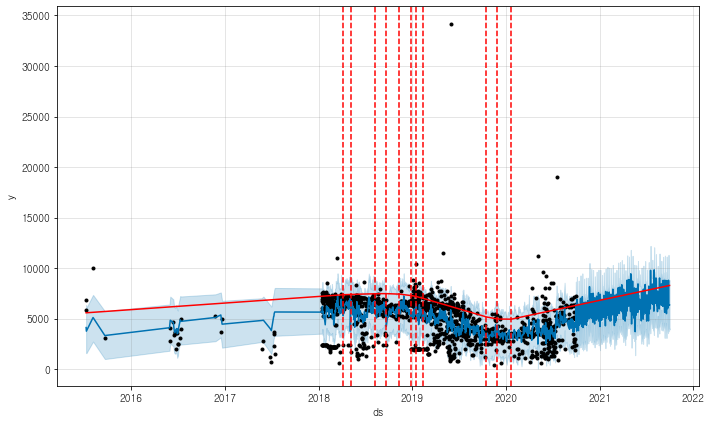

In [13]:
# 점선 = 트렌드 변화 지점
from fbprophet.plot import add_changepoints_to_plot
fig1 =prophet.plot(forecast)
a=add_changepoints_to_plot(fig1.gca(), prophet, forecast)

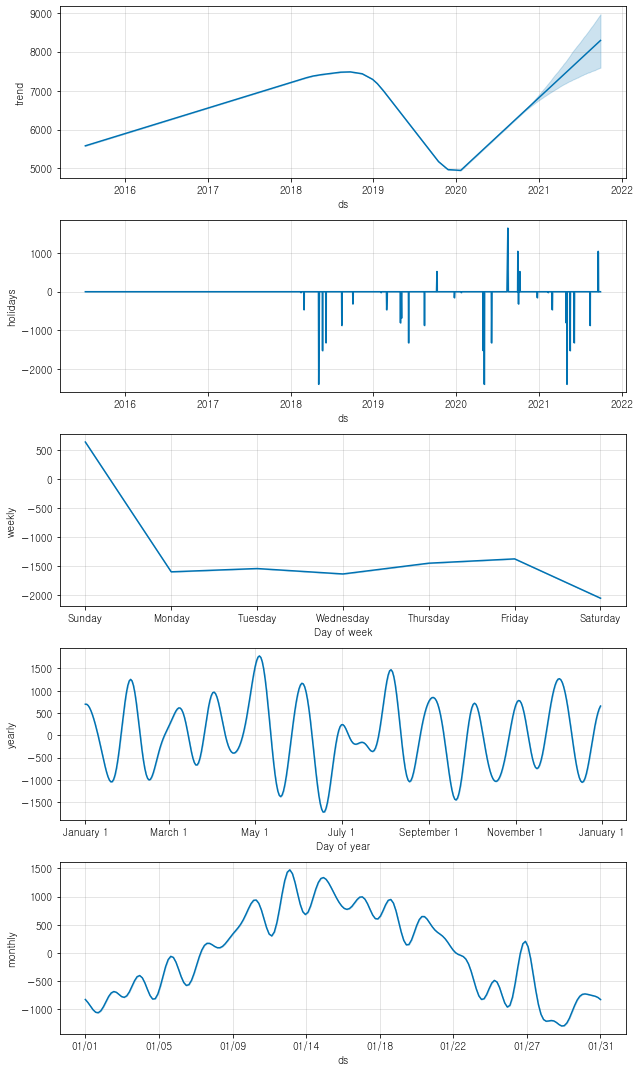

In [14]:
fig2 = prophet.plot_components(forecast) #EDA 할때 사용